In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [0]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20, 4
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.size'] = 20
mpl.rcParams['lines.markersize'] = 15
# mpl.rcParams.find_all('')

In [0]:
from scipy.io import wavfile  # Pour lire et écrire des fichiers sons
from scipy.signal import convolve2d
from pathlib import Path

In [0]:
import os
from google.colab import drive
drive.mount('drive')
os.chdir('drive/My Drive/univ/master-2/sam/seance2')
from sam_utils import plot_sound, plot_spectrum, db

# Exemple simple
Un contour est une variation rapide de la valeur des coefficients d'une image. On peut donc détecter un contour en cherchant les valeurs élevées du gradient de l'image.

L'image étant à deux dimensions, le gradient est un vecteur à deux dimensions: la dérivée horizontale et la dérivée verticale. De façon élémentaire, une dérivée selon l'axe horizontal peut être définie au pixel $x[i,j]$ comme $x[i, j+1] - x[i, j]$. On peut donc obtenir les dérivées horizontales sur toute une image en la filtrant avec le filtre $[-1, 1]$. De même, les dérivées verticales sont obtenues via le filtre $[-1, 1]^T$. On peut ensuite calculer la norme du vecteur gradient en chaque pixel pour avoir une estimation des contour.

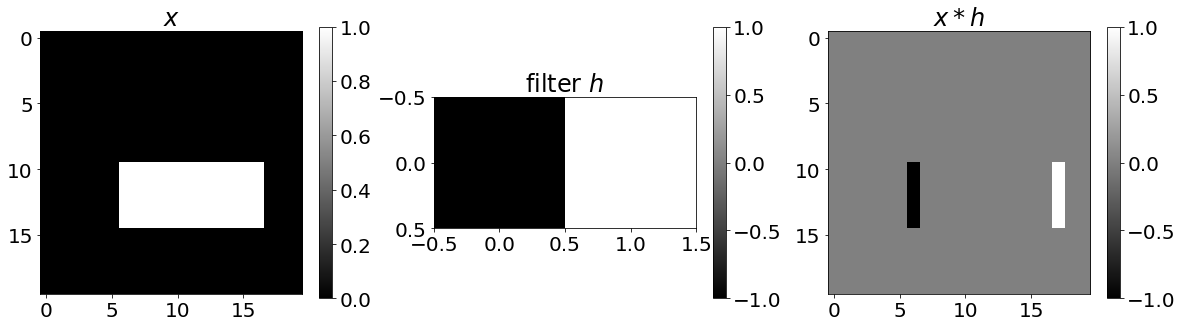

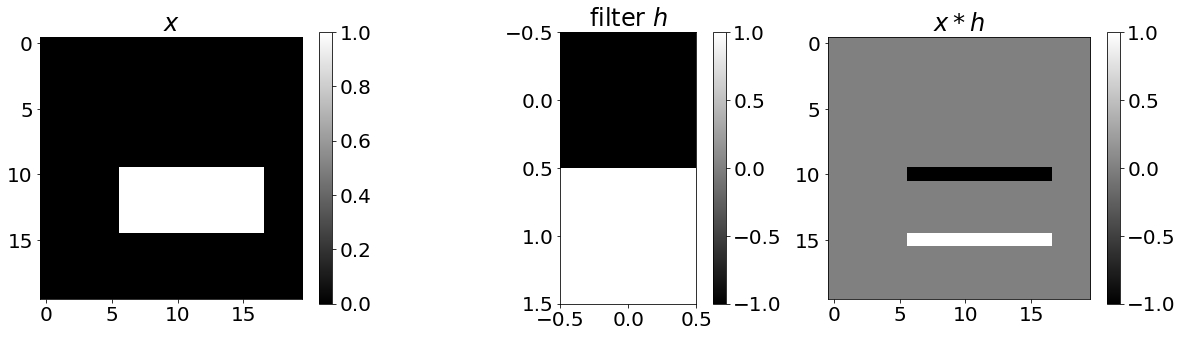

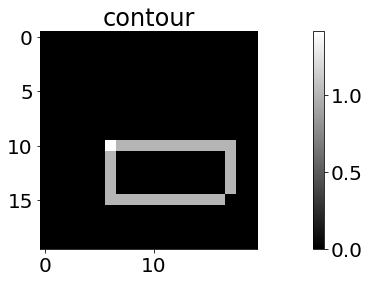

In [8]:
width = 20
x = np.zeros((width, width))
x[width//2:-width//4,width//3:-width//8] = 1

h = [[-1, 1]]
yh = convolve2d(x, h, mode='same')

plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.imshow(x, cmap='gray')
plt.title('$x$')
plt.colorbar()
plt.subplot(132)
plt.imshow(h, cmap='gray')
plt.title('filter $h$')
plt.colorbar()
plt.subplot(133)
plt.imshow(yh, cmap='gray')
plt.title('$x * h$')
plt.colorbar()

h = [[-1], [1]]
yv = convolve2d(x, h, mode='same')

plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.imshow(x, cmap='gray')
plt.title('$x$')
plt.colorbar()
plt.subplot(132)
plt.imshow(h, cmap='gray')
plt.title('filter $h$')
plt.colorbar()
plt.subplot(133)
plt.imshow(yv, cmap='gray')
plt.title('$x * h$')
plt.colorbar()

# Norme du gradient en chaque point
plt.figure()
plt.imshow(np.sqrt(yh**2+yv**2), cmap='gray')
plt.title('contour')
plt.colorbar()

# Extraction de contours par filtre de Sobel
De meilleures dérivées sont obtenues en utilisant des filtres $3\times 3$. On les utilise ici sur de vraies images.

In [0]:
image_path = Path('../data/images/')

Définissez les fonctions `get_sobel_h` et `get_sobel_v` qui renvoie respectivements les matrices 
$
\begin{pmatrix}
1 & 0& -1\\
2 & 0& -2\\
1 & 0& -1\\
\end{pmatrix}
$
et
$
\begin{pmatrix}
1 & 2& 1\\
0 & 0& 0\\
-1 & -2& -1\\
\end{pmatrix}
$.

Affichez le résultat comme une image.


In [0]:
def get_sobel_h():
    return [[1, 0, -1], [2, 0, -2], [1, 0, -1]]

def get_sobel_v():
    return [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

Appliquez ces filtres à une image et affichez les deux images obtenues.

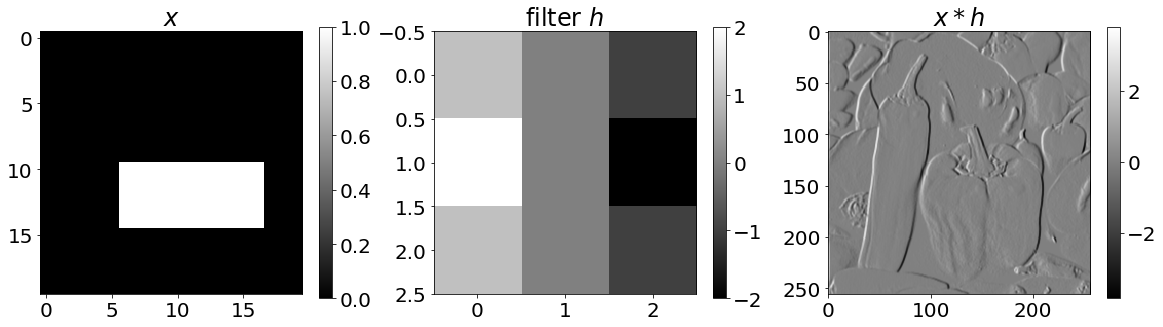

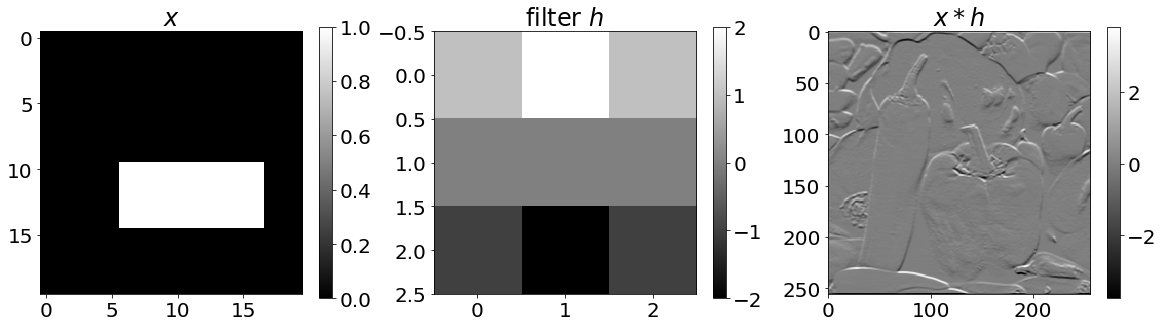

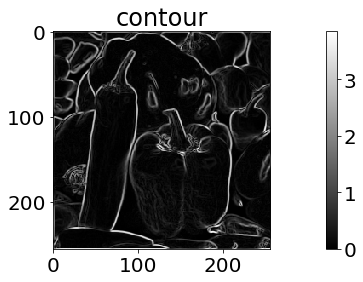

In [14]:
file = image_path / 'pepper.png'
img = plt.imread(str(file))

h = get_sobel_h()
yh = convolve2d(img, h, mode='same')

plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.imshow(x, cmap='gray')
plt.title('$x$')
plt.colorbar()
plt.subplot(132)
plt.imshow(h, cmap='gray')
plt.title('filter $h$')
plt.colorbar()
plt.subplot(133)
plt.imshow(yh, cmap='gray')
plt.title('$x * h$')
plt.colorbar()

h = get_sobel_v()
yv = convolve2d(img, h, mode='same')

plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.imshow(x, cmap='gray')
plt.title('$x$')
plt.colorbar()
plt.subplot(132)
plt.imshow(h, cmap='gray')
plt.title('filter $h$')
plt.colorbar()
plt.subplot(133)
plt.imshow(yv, cmap='gray')
plt.title('$x * h$')
plt.colorbar()

# Norme du gradient en chaque point
plt.figure()
plt.imshow(np.sqrt(yh**2+yv**2), cmap='gray')
plt.title('contour')
plt.colorbar()

Définissez la fonction `extract_contours_sobel(x)` qui prend en argument une image (`ndarray`) et renvoie une image de `y` la même taille telle que $y(i,j)=\sqrt{y_h(i,j)^2 + y_v(i,j)^2}$ où $y_h$ et $y_v$ sont les images obtenues en appliquant les deux filtres de Sobel.

In [0]:
def extract_contours_sobel(x):
    filter_horizontal = get_sobel_h()
    yh = convolve2d(x, filter_horizontal, mode='same')

    filter_vertical = get_sobel_v()
    yv = convolve2d(x, filter_vertical, mode='same')

    return np.sqrt(yh**2 + yv**2)

Appliquez la fonction à une image et affichez le résultat.

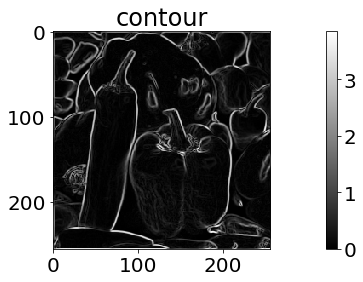

In [18]:
file = image_path / 'pepper.png'
img = plt.imread(str(file))

contours = extract_contours_sobel(img)

# Norme du gradient en chaque point
plt.figure()
plt.imshow(contours, cmap='gray')
plt.title('contour')
plt.colorbar()

# Extraction de contours par laplacien
Une autre façon d'estimer les contours est d'appliquer un unique filtre Laplacien, correspondant à des dérivées secondes.

Définissez les fonctions `get_laplacien` qui renvoie la matrice
$
\begin{pmatrix}
0 & -1 & 0\\
-1 & 4 & -1\\
0 & -1 & 0\\
\end{pmatrix}
$
et `extract_contours_laplacien(x)` qui renvoie le résultat du filtrage d'une image `x` par la matrice obtenue.


In [0]:
def get_laplacien():
    return [[0, -1, 0], [-1, 4, -1], [0, -1, 0]]

def extract_contours_laplacien(x):
    filter_horizontal = get_laplacien()
    yh = convolve2d(x, filter_horizontal, mode='same')

    filter_vertical = get_laplacien()
    yv = convolve2d(x, filter_vertical, mode='same')

    return np.sqrt(yh**2 + yv**2)

Appliquez la fonction à une image et affichez le résultat.

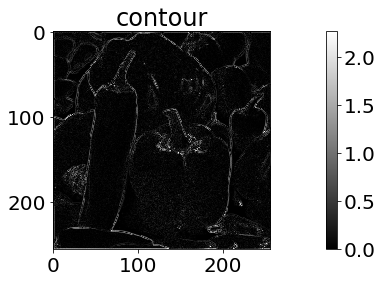

In [23]:
file = image_path / 'pepper.png'
img = plt.imread(str(file))

contours = extract_contours_laplacien(img)

# Norme du gradient en chaque point
plt.figure()
plt.imshow(contours, cmap='gray')
plt.title('contour')
plt.colorbar()